In [9]:
%store -r x_train_prepared
%store -r x_test_prepared
%store -r y_train_balanced
%store -r y_test

In [10]:
import os

os.environ["OPENBLAS_NUM_THREADS"] = "1"

from autosklearn.classification import AutoSklearnClassifier

In [11]:
model = AutoSklearnClassifier (
    time_left_for_this_task=600,
    ensemble_size=1,
    initial_configurations_via_metalearning=0,
    memory_limit=None,
    n_jobs=-1
)

In [12]:
model.fit(x_train_prepared, y_train_balanced)

/Users/gabrielurbanin/opt/anaconda3/envs/tcc-autosklearn/lib/python3.7/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 50440 instead
  f"Port {expected} is already in use.\n"


[WARNING] [2022-09-16 16:47:29,411:Client-AutoML(1):6524630a-35f8-11ed-bb21-46b6426a40e6] Capping the per_run_time_limit to 209.0 to have time for a least 2 models in each process.


AutoSklearnClassifier(ensemble_size=1,
                      initial_configurations_via_metalearning=0,
                      memory_limit=None, n_jobs=-1, per_run_time_limit=336,
                      time_left_for_this_task=420)

In [14]:
print(model.sprint_statistics())

auto-sklearn results:
  Dataset name: 6524630a-35f8-11ed-bb21-46b6426a40e6
  Metric: accuracy
  Best validation score: 0.998726
  Number of target algorithm runs: 41
  Number of successful target algorithm runs: 31
  Number of crashed target algorithm runs: 6
  Number of target algorithms that exceeded the time limit: 4
  Number of target algorithms that exceeded the memory limit: 0



In [15]:
y_pred = model.predict(x_test_prepared)

In [18]:
from sklearn.metrics import confusion_matrix

model_cf = confusion_matrix(y_pred, y_test)

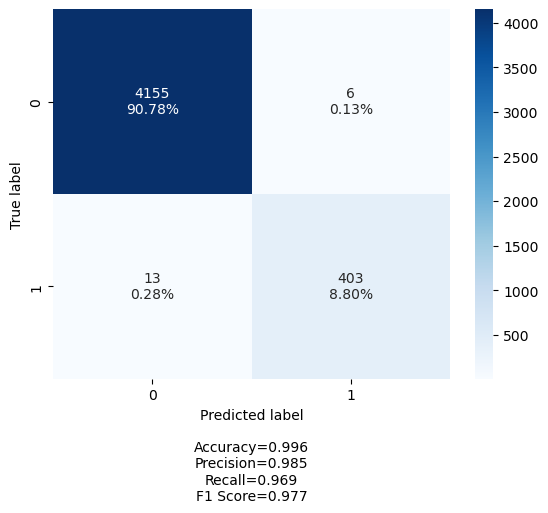

/Users/gabrielurbanin/opt/anaconda3/envs/tcc-autosklearn/lib/python3.7/site-packages/autosklearn/automl.py:317: RuntimeWarning: coroutine 'Client._shutdown' was never awaited
  self._dask_client.shutdown()
/Users/gabrielurbanin/opt/anaconda3/envs/tcc-autosklearn/lib/python3.7/site-packages/autosklearn/automl.py:318: RuntimeWarning: coroutine 'wait_for' was never awaited
  self._dask_client.close()
/Users/gabrielurbanin/opt/anaconda3/envs/tcc-autosklearn/lib/python3.7/site-packages/autosklearn/automl.py:318: RuntimeWarning: coroutine 'Client._close' was never awaited
  self._dask_client.close()


In [19]:
from confusion_matrix.cf_matrix import make_confusion_matrix

make_confusion_matrix(model_cf)